# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Riccardo Beccaria - Luglio 2021</span>

# <span style="color:green"> Esercitazione 2<span>

    

### Esercizio 2.1

Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Show a picture of both your estimations of $I$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

Per svolgere degli integrali tramite delle tecniche Monte Carlo, si considera la funzione integranda come prodotto di una distribuzione di probabilità $p(x)$ e una funzione $g(x)$. In quanto distribuzione di probabilità, la $p(x)$ deve essere non negativa. In tal modo è possibile stimare l'integrale come:

$I = \int_0^1 f(x) dx = \int_0^1 p(x)*g(x)= \frac{1}{N}\sum_{i=0}^N g(x_i)$ con $x_i$ estratto secondo la distribuzione di probabilità $p(x)$.


Quindi, per quanto riguarda il primo punto in cui è richiesto la valutazione dell'integrale campionando uniformemente tra 0 e 1, l'integrale si riduce semplicemente a:
$$I\simeq \frac{1}{N} \sum_{i=0}^N \frac{\pi}{2}\cos(\pi * x_i/2)$$ 
Nel limite di $N \to \infty$ e con $x_i \in [0,1]$ estratto uniformemente. Ho riportato nel grafico sottostante i risultati trovati compiendo $10^4$ estrazioni suddivise in $300$ blocchi. Come nella scorsa esercitazione, ho presentato attraverso il metodo di Data Blocking il valore dell'integrale a cui ho sottratto 1. Dovrò quindi verificare la convergenza.

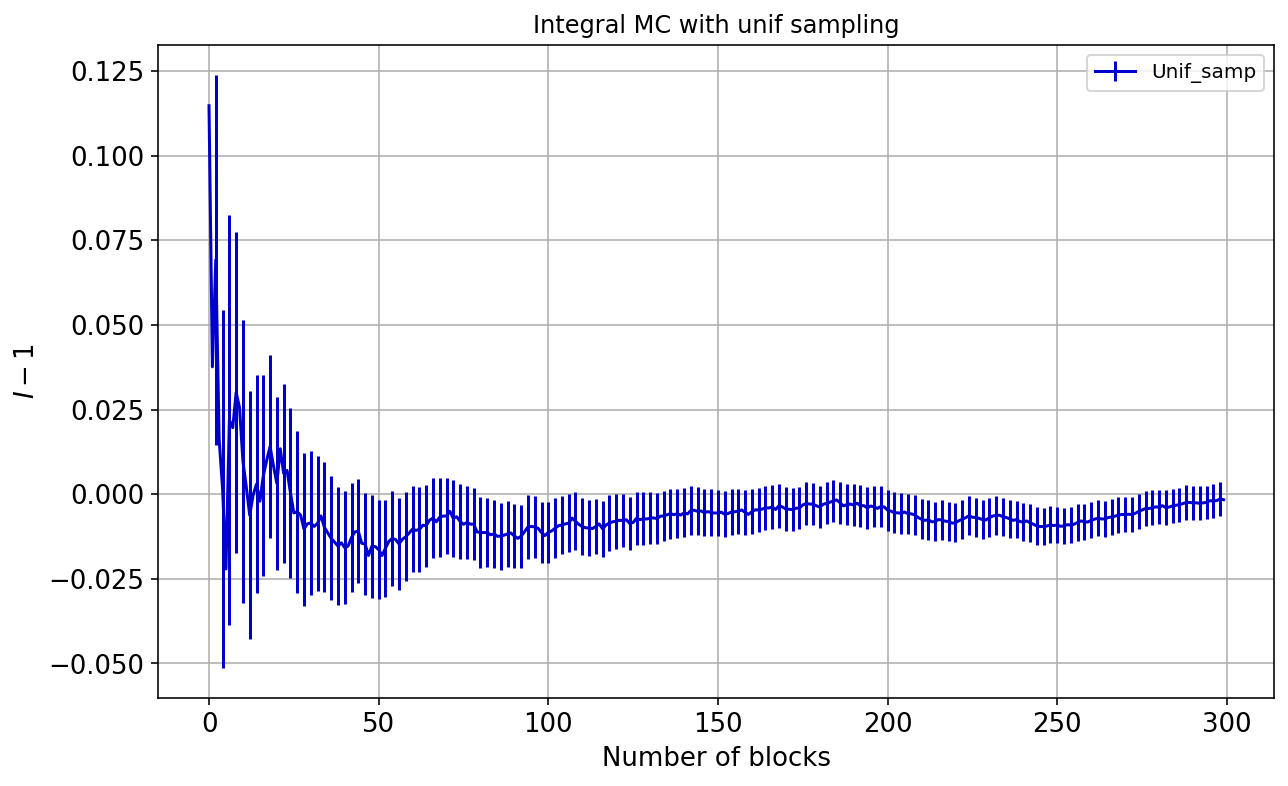

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.optimize import curve_fit
%config InlineBackend.figure_format = 'retina'

integral,error = np.loadtxt("./02.1/integral.txt", usecols=(0,2), delimiter=' ', unpack='true')
N=300
M=100000
L=int(M/N)

x = np.arange(N)
x*=L

plt.figure(figsize=(10,6))
plt.errorbar(x/L,integral-1,yerr=error,c='mediumblue', errorevery=2, label='Unif_samp')

plt.title('Integral MC with unif sampling')
plt.xlabel('Number of blocks', fontsize=13)
plt.ylabel(r'$I-1$', fontsize=13)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.legend()
plt.grid()
plt.show()

Riprendendo il discorso precedente, ho spiegato come è possibile svolgere gli integrali tramite tecniche Monte Carlo dividendo semplicemente l'integranda in un prodotto di una distribuzione di probabilità e di un'altra funzione. È importante ossservare che tanto meglio la distribuzione di probabilità $p(x)$ con cui campiono è simile alla funzione integrande di partenza, tanto più l'integrale Monte Carlo sarà efficiente e l'errore commesso piccolo. Infatti come errore per l'integrale si utilizza la varianza: $\sigma^2 = \langle g^2\rangle _p - \langle g \rangle _p ^2$


Proprio per questa ragione è utile andare a calcolare gli integrali attraverso il metodo dell' <font color="red">Importance Sampling</font>. Questa tecnica consiste nell'andare a scegliere una distribuzione di probabilità $\rho^*(x)$ il più possibile simile alla funzione integranda $f(x)=\frac{\pi}{2} cos(\frac{\pi}{2} x)$. In tal modo:
$$I=\int_0^1 f(x) dx = \int_0^1 [ \frac{f(x)}{p^*(x)} ] p^*(x)$$

Così facendo allora estrarrò dei valori $x_i$ con una distribuzione di probabilità $p^*(x)$ e valutero la funzione $\frac{f(x)}{p^*(x)}$ su quel punto estratto. La somiglianza della distribuzione di probabilità con la funzione integranda mi permette così di avere un metodo computazionalmente molto efficiente per calcolare l'integrale.

Come funzione di distribuzione di probabilità ho scelto $p^*(x) = -x^2 +\frac{4}{3}$ ovvero una parabola rivolta verso il basso. Nell'intervallo [0,1] la parabola è non negativa, per cui soddisfa i criteri per essere scelta come distribuzione di probabilità con cui campionare. Come è possibile osservare dal grafico sottostante, questa parabola approssima molto bene la funzione integranda studiata.

Per campionare secondo la distribuzione di probabilità $p^*(x)$ ho implementato nella mia libreria un metodo che:
- Estrae casualmente $x \in [0,1]$ ed estrae casualmente $y \in [0,p^*_{max}]$. 
- A questo punto se il punto di coordinate $(x,y)$ è sottostante alla funzione $p^*(x)$, il metodo restituirà $x$ come variabile estratta secondo la distribuzione $p^*(x)$. Altrimenti effettuerà nuovamente le estrazioni di x e di y.

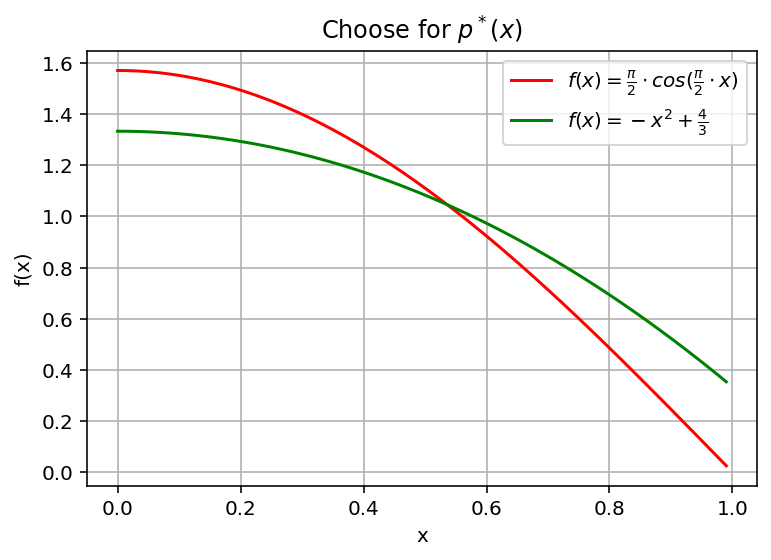

In [2]:
plt.figure(figsize=(6,4))
z=np.arange(0.0, 1.0, 0.01)
y=np.ones(np.size(z))
plt.plot(z, np.pi/2*np.cos(np.pi*z/2), label=r'$f(x)=\frac{\pi}{2}\cdot cos(\frac{\pi}{2}\cdot x)$', color='red')
plt.plot(z, -z*z+4/3, label=r'$f(x)=-x^2+\frac{4}{3}$', color='green')
plt.title(r'Choose for $p^*(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Come è possibile vedere, la mia parabola approssima bene l'integranda. Pertanto ho effettuato Importance Sampling con questa funzione. Ho riportato quì sotto i valori ottenuti col metodo del Data Blocking.

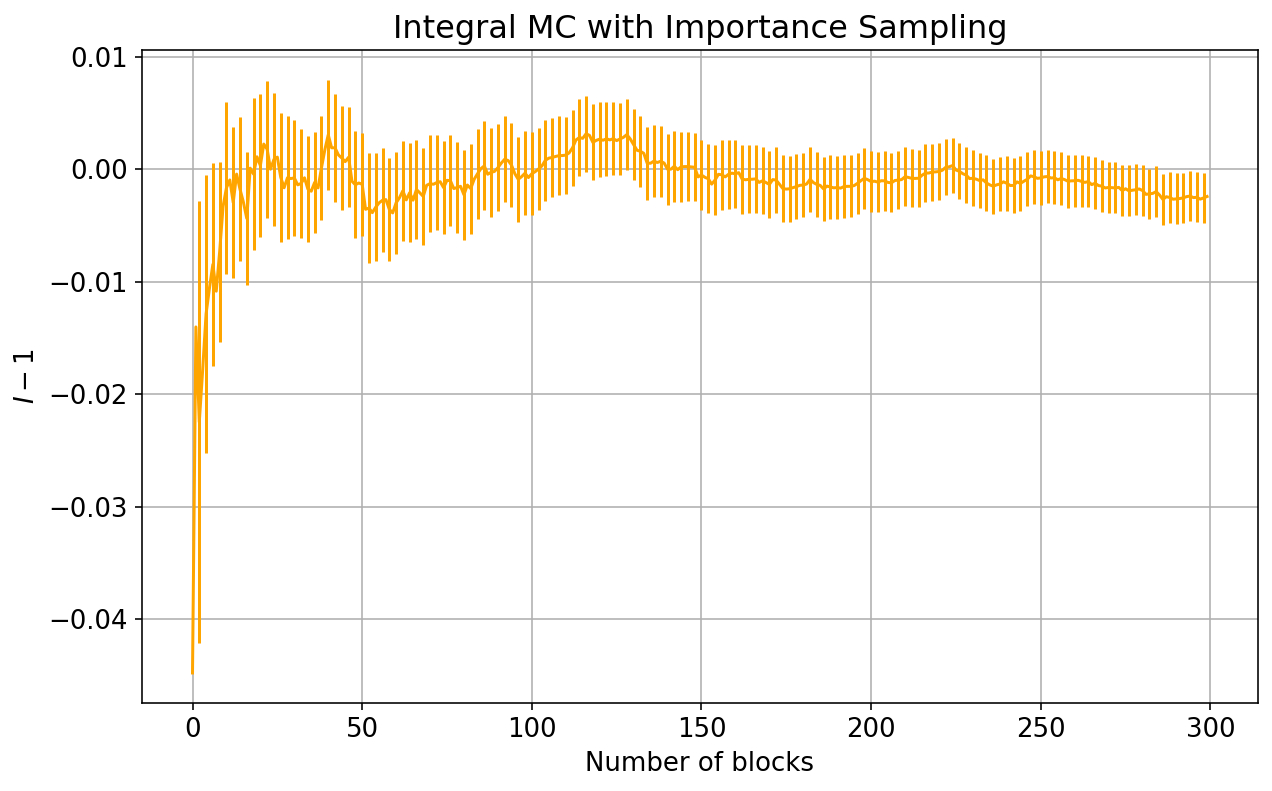

In [3]:
integral_samp,error_samp = np.loadtxt("./02.1/imp_samp_parab.txt", usecols=(0,2), delimiter=' ', unpack='true')

x = np.arange(N)
x*=L

plt.figure(figsize=(10,6))
plt.errorbar(x/L,integral_samp-1,yerr=error_samp,c='orange', errorevery=2, label='Imp_samp')
plt.title('Integral MC with Importance Sampling', fontsize=16)
plt.xlabel('Number of blocks', fontsize=13)
plt.ylabel(r'$I-1$', fontsize=13)
plt.xticks(size = 13)
plt.yticks(size = 13)

plt.grid()
plt.show()

Per mostrare la forza dell'Importance Sampling ho deciso di andare a graficare insieme le due curve sovrastanti per confrontare la convergenza dell'integrale Monte Carlo effettuato con campionamento uniforme e con Importance Sampling.

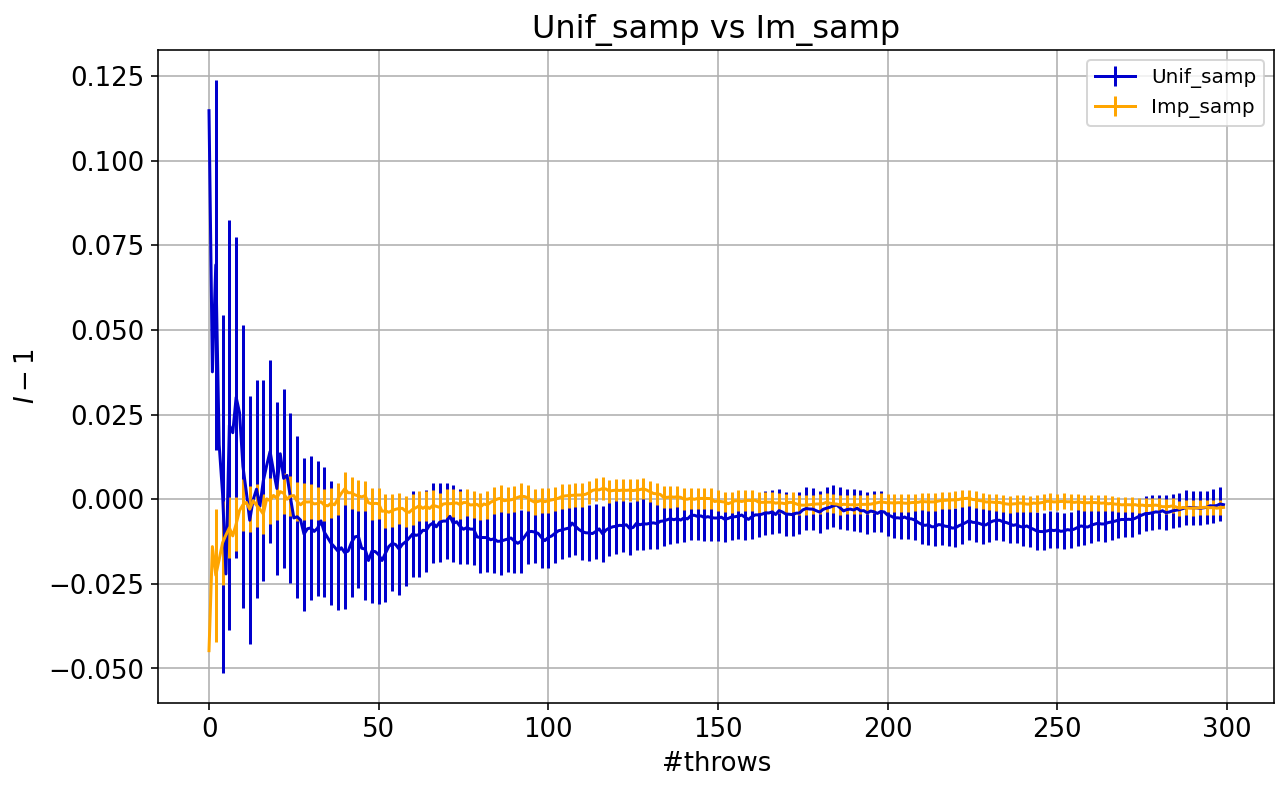

In [6]:
plt.figure(figsize=(10,6))
plt.errorbar(x/L,integral-1,yerr=error,c='mediumblue', errorevery=2, label='Unif_samp')
plt.errorbar(x/L,integral_samp-1,yerr=error_samp,c='orange', errorevery=2, label='Imp_samp')

plt.title('Unif_samp vs Im_samp', fontsize=16)
plt.xlabel('#throws', fontsize=13)
plt.ylabel(r'$I-1$', fontsize=13)
plt.xticks(size = 13)
plt.yticks(size = 13)

plt.grid()
plt.legend()
plt.show()

Com'è possibile osservare, entrambi i metodi convergono al crescere di N numero di blocchi con cui sto effettuando l'integrale. È altrattanto evidente la forza dell'Importance Sampling che già dopo i primi blocchi presenta barre di errore molto più piccole delle barre di errore che si ottengono invece campionando uniformemente.

### Esercizio 2.2

- 3D Random Walks (RW) on a cubic lattice and in the continuum: Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a random direction obtained by sampling uniformly the solid angle.

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

Ho simulato ogni Random Walk utilizzando un vettore *v* di tre componenti che rappresentano le coordinate cartesiane. Ad ogni step della simualazione, richiamo la funzione `Passo` che ho implementato nella mia libreria. Questa funzione prende in ingresso il mio vettore *v* e restituisce il vettore stesso che ha compiuto un passo. In questa funzione infatti si estrae randomicamente una direzione e un verso, verso cui il Random Walk deve spostarsi. Ad ogni step viene misurato il valor medio della quantità $|\vec{r}_N|^2$. Di ognuna di queste misure viene fatta la radice quadrata e viene sommata nell'opportuno elemento di un secondo vettore *m*. Questo vettore *m* è in realtà una matrice 100 x 100. Ogni riga di queste matrice rappresenta un blocco, e ogni elemento in ciascuna riga rappresenta il passo a cui si è arrivati.

Pertanto, se sono nell'i-esimo blocco, una volta fatto il j-esimo passo, valuto la quantità $\sqrt{|\vec{r}_N|^2}$ e la sommo alla componente $m_{ij}$ della matrice *m*.
Questo mi permette di avere un codice computazionalmente efficiente, e di non dover ricominciare il Random Walk ogni volta che effettuo una misura.

1. Per quanto riguarda il RW sul reticolo cubico ho effettuato $10^4$ Random Walks sul reticolo cubico di passo $a=1$. Ho diviso le $10^4$ ripetizioni in 100 blocchi per campionare il valor medio di $\sqrt{|\vec{r}_N|^2}$ tramite il metodo di Data Blocking.
2. Per il RW in spazio continuo, ho invece modificato la funzione `Passo`. Ho fatto sì che all'interno di questa funzione si campionasse l'angolo solido e ci si muovesse nella direzione di quell'angolo con un passo $a=1$. 

<font color="red">N.B.</font> È utile ricordare che il campionamento dell'angolo solido non avviene semplicemente campionando uniformemente $\theta \in [0, \pi]$ e $ \phi \in [0, 2\pi]$, ma avviene invece campionando $\theta= \arccos(1-2r) \mbox{ con }r \in [0,1]$ uniforme e $ \phi \in [0, 2\pi]$ campionato uniformemente.

3D lattice fit parameter: k = [1.00234946]
3D Continuus fit parameter: k = [0.99638375]


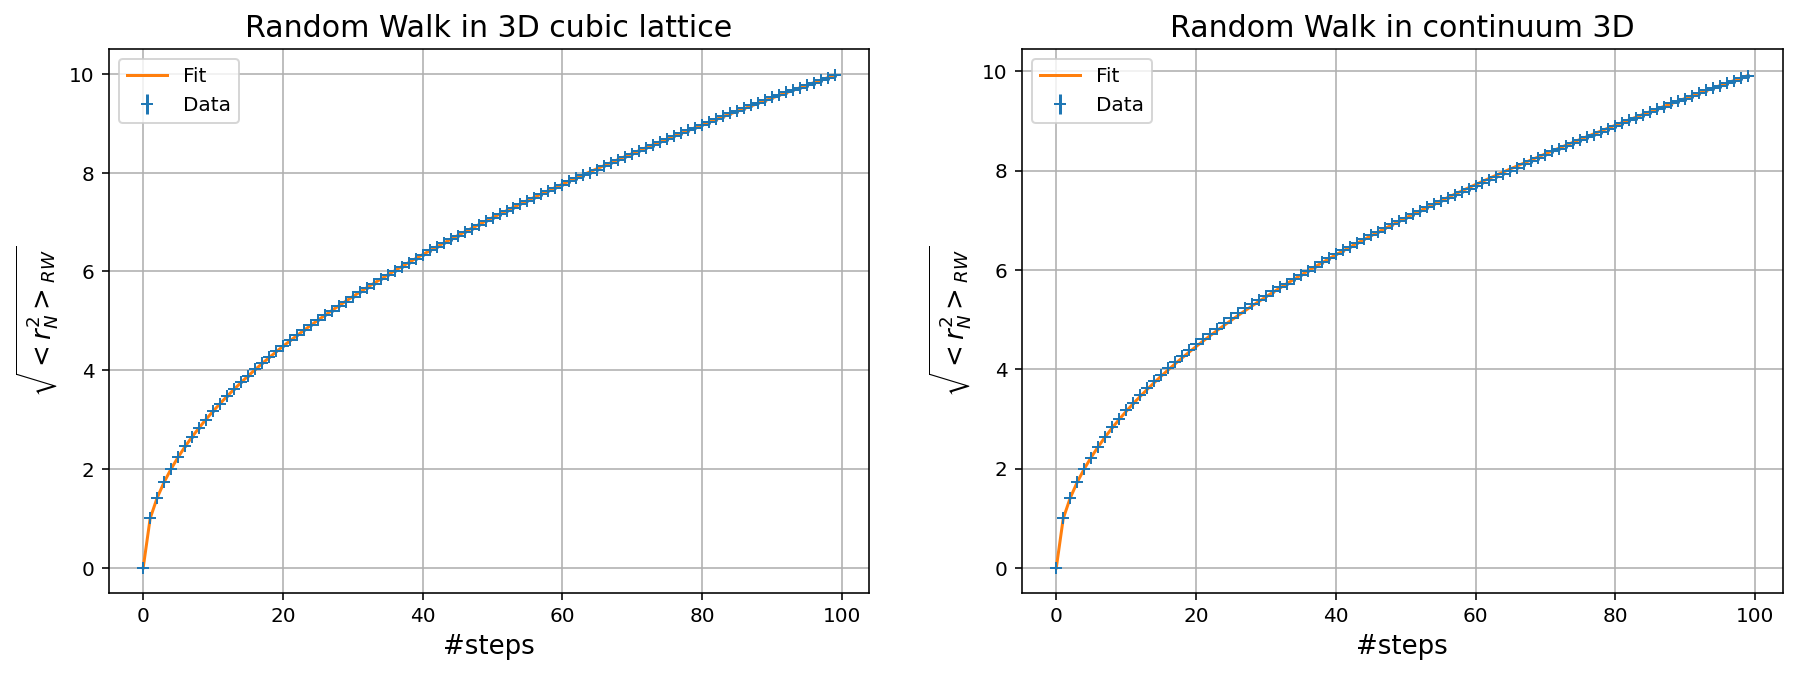

In [7]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import optimize
%config InlineBackend.figure_format = 'retina'


def fit_function(x, a):
    return a * np.sqrt(x)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

(step, R, errR) = np.loadtxt('./02.2/random_walk.txt', unpack=True, usecols=(0, 1, 3), delimiter=' ')
params = optimize.curve_fit(fit_function, step, R)
axs[0].set_title('Random Walk in 3D cubic lattice', fontsize=15)
axs[0].errorbar(step, R, yerr=errR, linestyle = " ", marker="+", label ='Data', markersize=6)
axs[0].plot(step, fit_function(step, params[0]), label='Fit')
print('3D lattice fit parameter: k =', params[0])



(step, R, errR) = np.loadtxt('./02.2/random_walk2.txt', unpack=True, usecols=(0, 1, 3), delimiter=' ')
params = optimize.curve_fit(fit_function, step, R)
axs[1].set_title('Random Walk in continuum 3D', fontsize=15)
axs[1].errorbar(step, R, yerr=errR, linestyle = " ", marker="+", label ='Data', markersize=6)
axs[1].plot(step, fit_function(step, params[0]), label='Fit')
print('3D Continuus fit parameter: k =', params[0])


for ax in axs.flat:
    ax.set_xlabel('#steps', fontsize=13)
    ax.set_ylabel('$\sqrt{<r_N^2>_{RW}}$', fontsize=13)
    ax.legend(loc='best', fontsize='medium')
    ax.grid(True)

Ho da ultimo eseguito un fit dei miei dati con la funzione $f(x)=k \cdot \sqrt{N}$. Il fit ottenuto su questi dati ottenuti con $10^4$ ripetizioni di Random Walks mostrano dei valori di:
- $k=1.002$ per le simulazioni su reticolo cubico.
- $k=0.996$ per le simulazioni eseguite su spazio continuo.

Questo indica chiaramente un comportamento diffusivo del sistema. I processi stocastici che presentano un comportamento diffusivo, sono proprio quei processi che come il RW presentano il modulo dello spostamento spostamento proporzionale alla radice del numero di passi eseguiti, o proporzionale al tempo qualora la variabile stocastica abbia una dipendenza temporale: $\sqrt{{\Delta \vec{r}}^2}= \sqrt{t}$.